### Discussion Related With Outliers And Imapct On Machine Learning!

#### What are outliers??

it is a completely different datapoints or records. Suppose i have a dataset and suppose in that particular dataset i have some records or datapoints and suppose some of the records are significantly different the other records itself.


#### which machine learning are sensitive to outliers??

1. Naivye Bayes Classifier--- Not Sensitive To Outliers
2. SVM----                    Not sensitive to outliers

3. Linear Regression--------  Sensitive to outliers
4. Logistic Regression------  sensitive to outlires
5. Decision Tree Regressor or Classifier------- not sensitive 
6. Ensemble(RF,XGboost,GB)------- not sensitive 
7. KNN--------------------------- not sensitive 
8. Kmeans------------------------ sensitive
9. Hierarichal------------------- sensitive
10. PCA ------------------------- very very sensitive
11. Neural Networks-------------- sensitive


In [1]:
import pandas as pd


In [2]:
df=pd.read_csv("Titanic_dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['Age'].isnull().sum()

177

In [4]:
import seaborn as sns

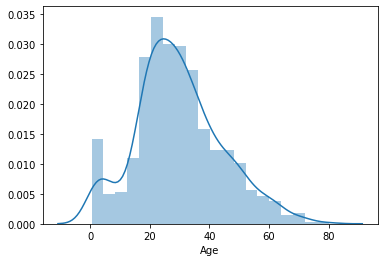

In [6]:
sns.distplot(df['Age'].dropna())

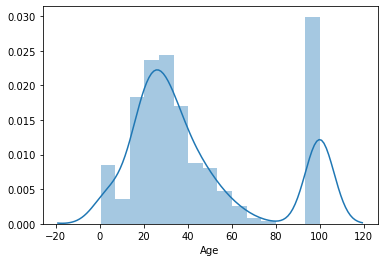

In [8]:
sns.distplot(df['Age'].fillna(100))





#### GAussian Distributed or norally distributed

Text(0, 0.5, 'No. of passengers')

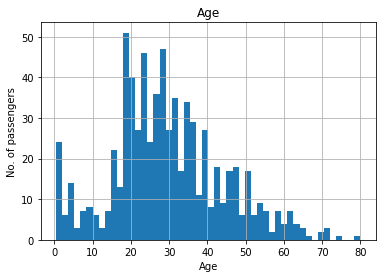

In [9]:
figure = df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No. of passengers')

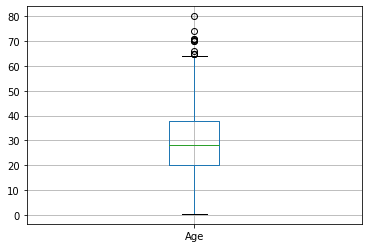

In [29]:
figure=df.boxplot(column="Age")

In [12]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
#### Assuming Age follows A Guassian Distribution we will boundaries which differentiates the outliers

upper_boundary=df['Age'].mean()+3*df['Age'].std()
lower_boundary=df['Age'].mean()-3*df['Age'].std()


In [20]:
print(upper_boundary)
print(lower_boundary)
print(df['Age'].mean())
print(3*df['Age'].std())

73.27860964406095
-13.88037434994331
29.69911764705882
43.57949199700213


In [21]:
43.57949199700213 + 29.69911764705882

73.27860964406095

In [22]:
#### extreme value analysis

##### lets compute the interquantile range to calculate the boundaries . IQR is the dfference betweem 75 percentile and 25 percentile.

IQR = df.Age.quantile(0.75) - df.Age.quantile(0.25)


In [23]:
IQR

17.875

In [25]:
lower_bridge = df['Age'].quantile(0.25)-(IQR*1.5)
upper_bridge = df['Age'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-6.6875
64.8125


In [26]:
### Extreme outliers

lower_bridge = df['Age'].quantile(0.25)-(IQR*3)
upper_bridge = df['Age'].quantile(0.75)+(IQR*3)
print(lower_bridge)
print(upper_bridge)

-33.5
91.625


#### features is skewed

Text(0, 0.5, 'No. of passengers')

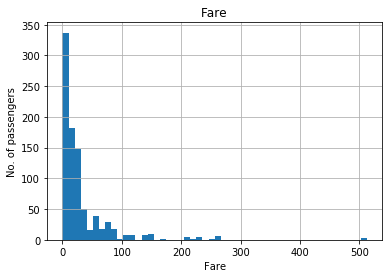

In [28]:
figure = df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No. of passengers')

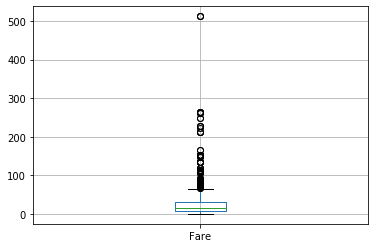

In [30]:
figure=df.boxplot(column="Fare")

In [31]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [32]:
##### lets compute the interquantile range to calculate the boundaries . IQR is the dfference betweem 75 percentile and 25 percentile.

IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)

In [34]:
lower_bridge = df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge = df['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-26.724
65.6344


In [33]:
#### extreme outliers

lower_bridge = df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge = df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge)
print(upper_bridge)

-61.358399999999996
100.2688


In [37]:
data = df.copy()

In [38]:
data.loc[data['Age']>73,'Age'] = 731


In [39]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
data['Age'].isnull().sum()

177

In [41]:
data.loc[data['Fare']>100,'Fare']=100

In [44]:
data.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [48]:
### logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test
                  )
y_pred1=classifier.predict_proba(X_test)
from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score:{}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score:{}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score:0.6791044776119403
roc_auc_score:0.709149749926449


In [49]:
### RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test
                  )
y_pred1=classifier.predict_proba(X_test)
from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score:{}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score:{}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score:0.6865671641791045
roc_auc_score:0.7328037658134745
